## **WINE CLASSIFICATION**
#### Primera Versión

Descripción:



DataSet: https://www.kaggle.com/datasets/yasserh/wine-quality-dataset


In [1]:
#Importación de librerías

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
wine = pd.read_csv("WineQT.csv", sep = ",")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


###**Análisis exploratorio y estudio de las variables**

En este apartado se busca identificar valores outilers o valores erroneos

Información para validar los datos: https://eprints.ucm.es/id/eprint/29446/7/PIMCD%20N%C2%BA%20243.%20ANEXO%201.%20E-BOOK-%20EL%20VINO%20Y%20SU%20AN%C3%81LISIS.pdf


In [4]:
# Identificación de datos NULOS
wine.isnull().sum() #El dataset no contiene datos nulos

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [5]:
#Elimino la columna Id ya que no me aportará nada al modelo

wine = wine.drop(['Id'], axis=1)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


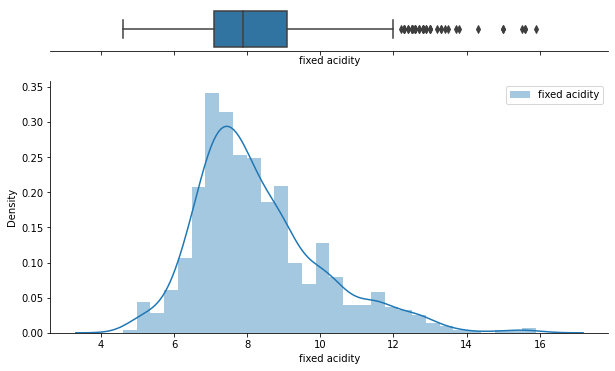

In [6]:
#Detección de Outilers - mediante Rango intercuartílico

#Análisis gráfico de variable: fixed acidity

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,6), gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(wine['fixed acidity'], ax=ax_box) 
sns.distplot(wine['fixed acidity'], ax=ax_hist, label='fixed acidity')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

In [7]:
#Calculo de umbral inferior y superior variable: fixed acidity
IQR = wine['fixed acidity'].quantile(0.75) - wine['fixed acidity'].quantile(0.25)
umbral_inferior = wine['fixed acidity'].quantile(0.25) - IQR*1.5
umbral_superior = wine['fixed acidity'].quantile(0.75) + IQR*1.5


#Identifico los valores outliers en el dataframe
wine['fixed acidity_outlier'] = 0
wine.loc[wine['fixed acidity'] > umbral_superior, 'fixed acidity_outlier'] = 1
wine.loc[wine['fixed acidity'] < umbral_inferior, 'fixed acidity_outlier'] = 1 #no hay valores por debajo del umbral inferior

In [8]:
#Cuento la cantidad de valores outliers en la variable fixed acidity
wine['fixed acidity_outlier'].value_counts()

#Se detectaron 44 datos ouliers para la variable

0    1099
1      44
Name: fixed acidity_outlier, dtype: int64

Cantidad de valores Outliers: 
0    1129
1      14
Name: volatile acidity_outlier, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


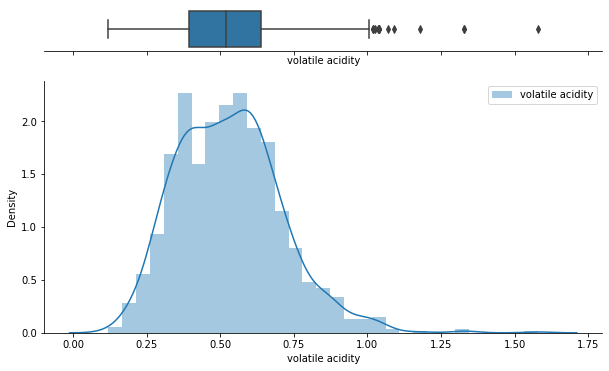

In [9]:
# Se realiza el mismo tratamiento de Outliers para las variables restantes

#Calculo de umbral inferior y superior variable: volatile acidity
IQR = wine['volatile acidity'].quantile(0.75) - wine['volatile acidity'].quantile(0.25)
umbral_inferior = wine['volatile acidity'].quantile(0.25) - IQR*1.5
umbral_superior = wine['volatile acidity'].quantile(0.75) + IQR*1.5

#Identifico los valores outliers en el dataframe
wine['volatile acidity_outlier'] = 0
wine.loc[wine['volatile acidity'] > umbral_superior, 'volatile acidity_outlier'] = 1
wine.loc[wine['volatile acidity'] < umbral_inferior, 'volatile acidity_outlier'] = 1 

#Cuento la cantidad de valores outliers en la variable volatile acidity
print('Cantidad de valores Outliers: ')
print(wine['volatile acidity_outlier'].value_counts())

#Análisis gráfico de variable: fixed acidity

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,6), gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(wine['volatile acidity'], ax=ax_box) 
sns.distplot(wine['volatile acidity'], ax=ax_hist, label='volatile acidity')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

Cantidad de valores Outliers: 
0    1142
1       1
Name: citric acid_outlier, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


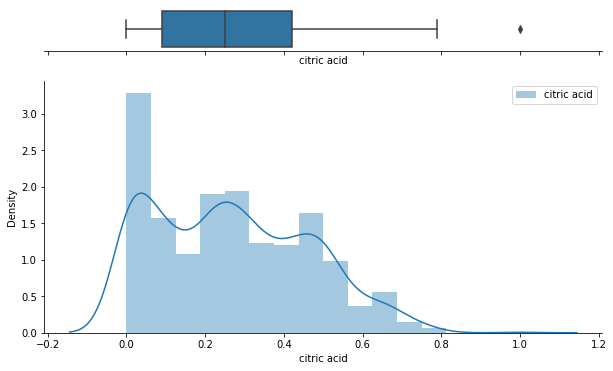

In [10]:
#Calculo de umbral inferior y superior variable: citric acid
IQR = wine['citric acid'].quantile(0.75) - wine['citric acid'].quantile(0.25)
umbral_inferior = wine['citric acid'].quantile(0.25) - IQR*1.5
umbral_superior = wine['citric acid'].quantile(0.75) + IQR*1.5

#Identifico los valores outliers en el dataframe
wine['citric acid_outlier'] = 0
wine.loc[wine['citric acid'] > umbral_superior, 'citric acid_outlier'] = 1
wine.loc[wine['citric acid'] < umbral_inferior, 'citric acid_outlier'] = 1 

#Cuento la cantidad de valores outliers en la variable citric acid
print('Cantidad de valores Outliers: ')
print(wine['citric acid_outlier'].value_counts())

#Análisis gráfico de variable: citric acid

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,6), gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(wine['citric acid'], ax=ax_box) 
sns.distplot(wine['citric acid'], ax=ax_hist, label='citric acid')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

#POR SER UN ÚNICO VALOR NO CONVIENE ELIMINARLO

Cantidad de valores Outliers: 
0    1033
1     110
Name: residual sugar_outlier, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


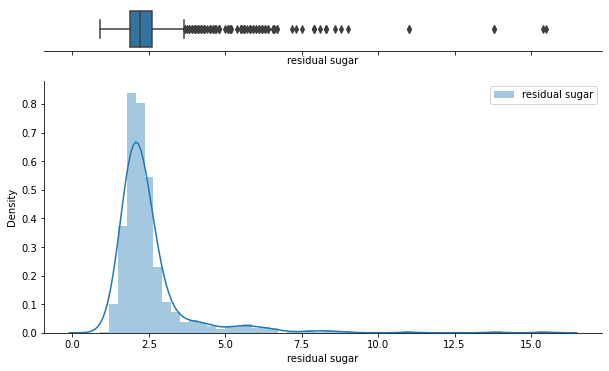

In [11]:
#Calculo de umbral inferior y superior variable: residual sugar
IQR = wine['residual sugar'].quantile(0.75) - wine['residual sugar'].quantile(0.25)
umbral_inferior = wine['residual sugar'].quantile(0.25) - IQR*1.5
umbral_superior = wine['residual sugar'].quantile(0.75) + IQR*1.5

#Identifico los valores outliers en el dataframe
wine['residual sugar_outlier'] = 0
wine.loc[wine['residual sugar'] > umbral_superior, 'residual sugar_outlier'] = 1
wine.loc[wine['residual sugar'] < umbral_inferior, 'residual sugar_outlier'] = 1 

#Cuento la cantidad de valores outliers en la variable residual sugar
print('Cantidad de valores Outliers: ')
print(wine['residual sugar_outlier'].value_counts())

#Análisis gráfico de variable: residual sugar

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,6), gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(wine['residual sugar'], ax=ax_box) 
sns.distplot(wine['residual sugar'], ax=ax_hist, label='residual sugar')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

#SE REGISTRA UN GRAN NÚMERO DE OUTLIERS

Cantidad de valores Outliers: 
0    1066
1      77
Name: chlorides_outlier, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


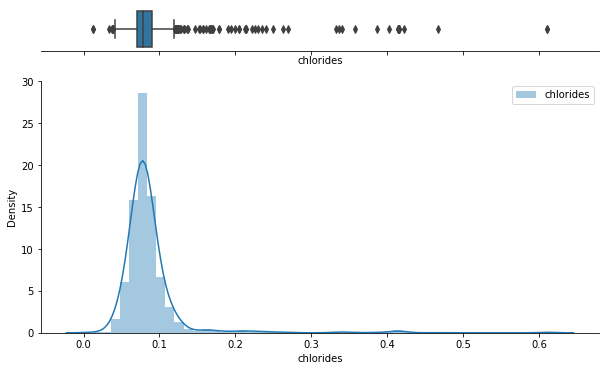

In [12]:
#Calculo de umbral inferior y superior variable: chlorides
IQR = wine['chlorides'].quantile(0.75) - wine['chlorides'].quantile(0.25)
umbral_inferior = wine['chlorides'].quantile(0.25) - IQR*1.5
umbral_superior = wine['chlorides'].quantile(0.75) + IQR*1.5

#Identifico los valores outliers en el dataframe
wine['chlorides_outlier'] = 0
wine.loc[wine['chlorides'] > umbral_superior, 'chlorides_outlier'] = 1
wine.loc[wine['chlorides'] < umbral_inferior, 'chlorides_outlier'] = 1 

#Cuento la cantidad de valores outliers en la variable chlorides
print('Cantidad de valores Outliers: ')
print(wine['chlorides_outlier'].value_counts())

#Análisis gráfico de variable: chlorides

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,6), gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(wine['chlorides'], ax=ax_box) 
sns.distplot(wine['chlorides'], ax=ax_hist, label='chlorides')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

Cantidad de valores Outliers: 
0    1125
1      18
Name: free sulfur dioxide_outlier, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


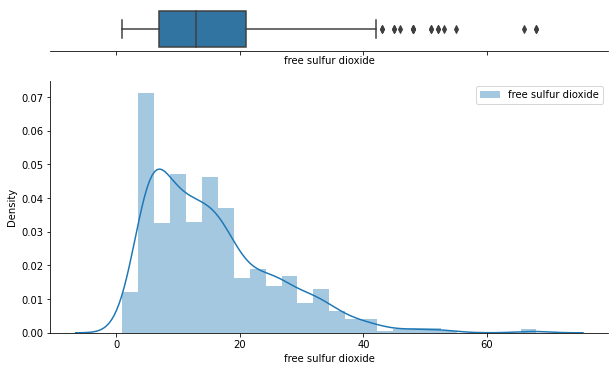

In [13]:
#Calculo de umbral inferior y superior variable: free sulfur dioxide
IQR = wine['free sulfur dioxide'].quantile(0.75) - wine['free sulfur dioxide'].quantile(0.25)
umbral_inferior = wine['free sulfur dioxide'].quantile(0.25) - IQR*1.5
umbral_superior = wine['free sulfur dioxide'].quantile(0.75) + IQR*1.5

#Identifico los valores outliers en el dataframe
wine['free sulfur dioxide_outlier'] = 0
wine.loc[wine['free sulfur dioxide'] > umbral_superior, 'free sulfur dioxide_outlier'] = 1
wine.loc[wine['free sulfur dioxide'] < umbral_inferior, 'free sulfur dioxide_outlier'] = 1 

#Cuento la cantidad de valores outliers en la variable free sulfur dioxide
print('Cantidad de valores Outliers: ')
print(wine['free sulfur dioxide_outlier'].value_counts())

#Análisis gráfico de variable: free sulfur dioxide

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,6), gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(wine['free sulfur dioxide'], ax=ax_box) 
sns.distplot(wine['free sulfur dioxide'], ax=ax_hist, label='free sulfur dioxide')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

Cantidad de valores Outliers: 
0    1103
1      40
Name: total sulfur dioxide_outlier, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


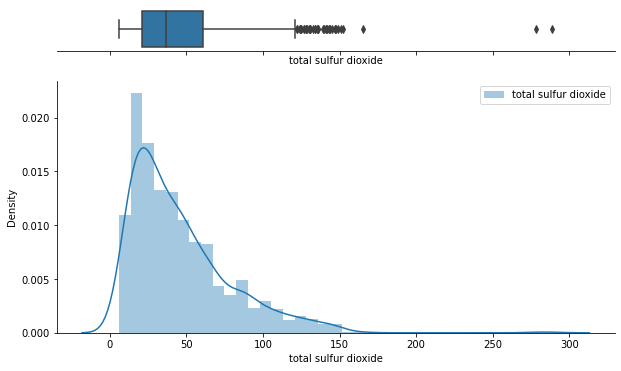

In [14]:
#Calculo de umbral inferior y superior variable: total sulfur dioxide
IQR = wine['total sulfur dioxide'].quantile(0.75) - wine['total sulfur dioxide'].quantile(0.25)
umbral_inferior = wine['total sulfur dioxide'].quantile(0.25) - IQR*1.5
umbral_superior = wine['total sulfur dioxide'].quantile(0.75) + IQR*1.5

#Identifico los valores outliers en el dataframe
wine['total sulfur dioxide_outlier'] = 0
wine.loc[wine['total sulfur dioxide'] > umbral_superior, 'total sulfur dioxide_outlier'] = 1
wine.loc[wine['total sulfur dioxide'] < umbral_inferior, 'total sulfur dioxide_outlier'] = 1 

#Cuento la cantidad de valores outliers en la variable total sulfur dioxide
print('Cantidad de valores Outliers: ')
print(wine['total sulfur dioxide_outlier'].value_counts())

#Análisis gráfico de variable: total sulfur dioxide
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,6), gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(wine['total sulfur dioxide'], ax=ax_box) 
sns.distplot(wine['total sulfur dioxide'], ax=ax_hist, label='total sulfur dioxide')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

Cantidad de valores Outliers: 
0    1107
1      36
Name: density_outlier, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


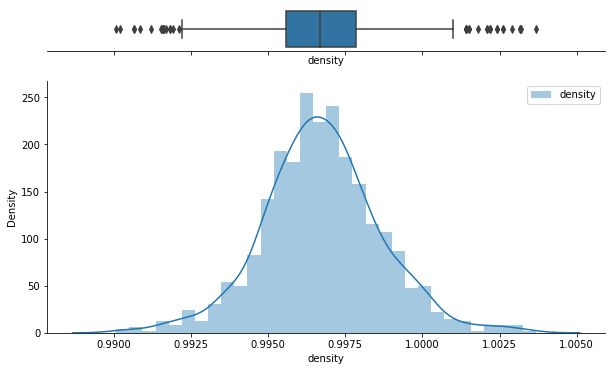

In [15]:
#Calculo de umbral inferior y superior variable: density
IQR = wine['density'].quantile(0.75) - wine['density'].quantile(0.25)
umbral_inferior = wine['density'].quantile(0.25) - IQR*1.5
umbral_superior = wine['density'].quantile(0.75) + IQR*1.5

#Identifico los valores outliers en el dataframe
wine['density_outlier'] = 0
wine.loc[wine['density'] > umbral_superior, 'density_outlier'] = 1
wine.loc[wine['density'] < umbral_inferior, 'density_outlier'] = 1 

#Cuento la cantidad de valores outliers en la variable density
print('Cantidad de valores Outliers: ')
print(wine['density_outlier'].value_counts())

#Análisis gráfico de variable: density
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,6), gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(wine['density'], ax=ax_box) 
sns.distplot(wine['density'], ax=ax_hist, label='density')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

Cantidad de valores Outliers: 
0    1123
1      20
Name: pH_outlier, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


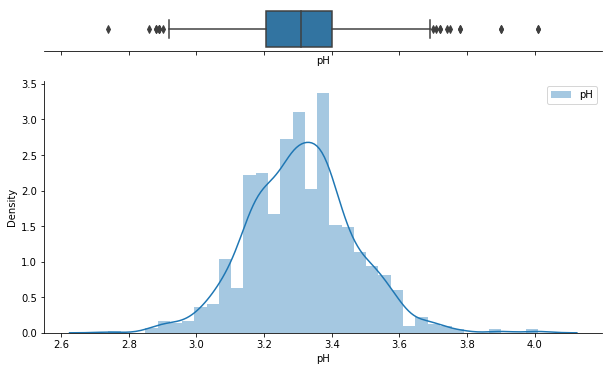

In [16]:
#Calculo de umbral inferior y superior variable: pH
IQR = wine['pH'].quantile(0.75) - wine['pH'].quantile(0.25)
umbral_inferior = wine['pH'].quantile(0.25) - IQR*1.5
umbral_superior = wine['pH'].quantile(0.75) + IQR*1.5

#Identifico los valores outliers en el dataframe
wine['pH_outlier'] = 0
wine.loc[wine['pH'] > umbral_superior, 'pH_outlier'] = 1
wine.loc[wine['pH'] < umbral_inferior, 'pH_outlier'] = 1 

#Cuento la cantidad de valores outliers en la variable pH
print('Cantidad de valores Outliers: ')
print(wine['pH_outlier'].value_counts())

#Análisis gráfico de variable: pH
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,6), gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(wine['pH'], ax=ax_box) 
sns.distplot(wine['pH'], ax=ax_hist, label='pH')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

Cantidad de valores Outliers: 
0    1100
1      43
Name: sulphates_outlier, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


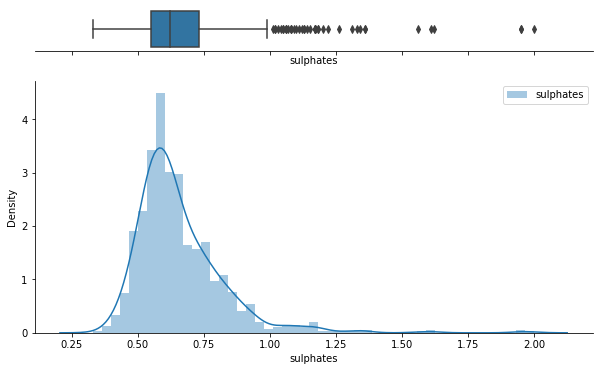

In [17]:
#Calculo de umbral inferior y superior variable: sulphates	                         alcohol	quality	
IQR = wine['sulphates'].quantile(0.75) - wine['sulphates'].quantile(0.25)
umbral_inferior = wine['sulphates'].quantile(0.25) - IQR*1.5
umbral_superior = wine['sulphates'].quantile(0.75) + IQR*1.5

#Identifico los valores outliers en el dataframe
wine['sulphates_outlier'] = 0
wine.loc[wine['sulphates'] > umbral_superior, 'sulphates_outlier'] = 1
wine.loc[wine['sulphates'] < umbral_inferior, 'sulphates_outlier'] = 1 

#Cuento la cantidad de valores outliers en la variable sulphates
print('Cantidad de valores Outliers: ')
print(wine['sulphates_outlier'].value_counts())

#Análisis gráfico de variable: sulphates
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,6), gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(wine['sulphates'], ax=ax_box) 
sns.distplot(wine['sulphates'], ax=ax_hist, label='sulphates')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

Cantidad de valores Outliers: 
0    1131
1      12
Name: alcohol_outlier, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


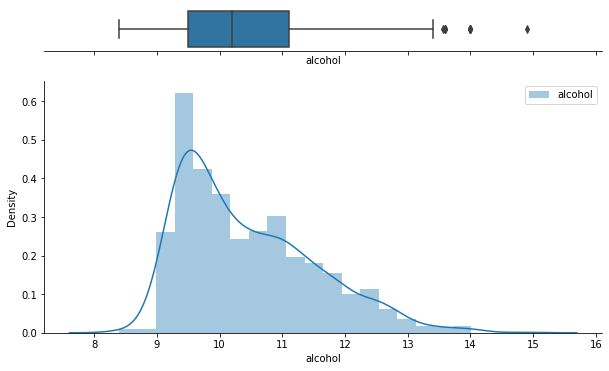

In [18]:
#Calculo de umbral inferior y superior variable: alcohol	                         	quality	
IQR = wine['alcohol'].quantile(0.75) - wine['alcohol'].quantile(0.25)
umbral_inferior = wine['alcohol'].quantile(0.25) - IQR*1.5
umbral_superior = wine['alcohol'].quantile(0.75) + IQR*1.5

#Identifico los valores outliers en el dataframe
wine['alcohol_outlier'] = 0
wine.loc[wine['alcohol'] > umbral_superior, 'alcohol_outlier'] = 1
wine.loc[wine['alcohol'] < umbral_inferior, 'alcohol_outlier'] = 1 

#Cuento la cantidad de valores outliers en la variable alcohol
print('Cantidad de valores Outliers: ')
print(wine['alcohol_outlier'].value_counts())

#Análisis gráfico de variable: alcohol
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,6), gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(wine['alcohol'], ax=ax_box) 
sns.distplot(wine['alcohol'], ax=ax_hist, label='alcohol')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

Cantidad de valores Outliers: 
0    1121
1      22
Name: quality_outlier, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


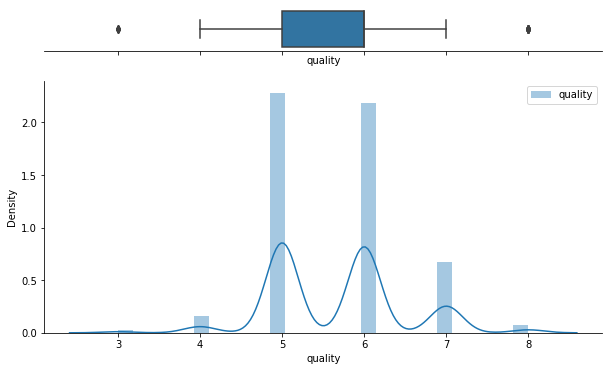

In [19]:
#Calculo de umbral inferior y superior variable: quality                         		
IQR = wine['quality'].quantile(0.75) - wine['quality'].quantile(0.25)
umbral_inferior = wine['quality'].quantile(0.25) - IQR*1.5
umbral_superior = wine['quality'].quantile(0.75) + IQR*1.5

#Identifico los valores outliers en el dataframe
wine['quality_outlier'] = 0
wine.loc[wine['quality'] > umbral_superior, 'quality_outlier'] = 1
wine.loc[wine['quality'] < umbral_inferior, 'quality_outlier'] = 1 

#Cuento la cantidad de valores outliers en la variable quality
print('Cantidad de valores Outliers: ')
print(wine['quality_outlier'].value_counts())

#Análisis gráfico de variable: quality
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,6), gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(wine['quality'], ax=ax_box) 
sns.distplot(wine['quality'], ax=ax_hist, label='quality')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

#NO DEBERÍAN SER ELIMINADOS

####DataFrame SIN Outliers

En esta primer versión del proyecto se decide eliminar los valores Outliers.
(Con excepción de la variable Quality)

Se crea el dataframe wine_sin_out

In [20]:
wine_sin_out = wine.copy()

In [21]:
#Elimino los valores Outliers del dataframe

wine_sin_out.drop(wine_sin_out.loc[wine_sin_out['fixed acidity_outlier'] == 1].index, inplace=True)
wine_sin_out.drop(wine_sin_out.loc[wine_sin_out['volatile acidity_outlier'] == 1].index, inplace=True)
wine_sin_out.drop(wine_sin_out.loc[wine_sin_out['citric acid_outlier'] == 1].index, inplace=True)
wine_sin_out.drop(wine_sin_out.loc[wine_sin_out['residual sugar_outlier'] == 1].index, inplace=True)
wine_sin_out.drop(wine_sin_out.loc[wine_sin_out['chlorides_outlier'] == 1].index, inplace=True)
wine_sin_out.drop(wine_sin_out.loc[wine_sin_out['free sulfur dioxide_outlier'] == 1].index, inplace=True)
wine_sin_out.drop(wine_sin_out.loc[wine_sin_out['total sulfur dioxide_outlier'] == 1].index, inplace=True)
wine_sin_out.drop(wine_sin_out.loc[wine_sin_out['density_outlier'] == 1].index, inplace=True)
wine_sin_out.drop(wine_sin_out.loc[wine_sin_out['pH_outlier'] == 1].index, inplace=True)
wine_sin_out.drop(wine_sin_out.loc[wine_sin_out['sulphates_outlier'] == 1].index, inplace=True)
wine_sin_out.drop(wine_sin_out.loc[wine_sin_out['alcohol_outlier'] == 1].index, inplace=True)
wine_sin_out.drop(wine_sin_out.loc[wine_sin_out['quality_outlier'] == 1].index, inplace=True)



wine_sin_out

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,citric acid_outlier,residual sugar_outlier,chlorides_outlier,free sulfur dioxide_outlier,total sulfur dioxide_outlier,density_outlier,pH_outlier,sulphates_outlier,alcohol_outlier,quality_outlier
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,...,0,0,0,0,0,0,0,0,0,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,...,0,0,0,0,0,0,0,0,0,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,...,0,0,0,0,0,0,0,0,0,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,...,0,0,0,0,0,0,0,0,0,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,...,0,0,0,0,0,0,0,0,0,0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,...,0,0,0,0,0,0,0,0,0,0
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,...,0,0,0,0,0,0,0,0,0,0
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# Elimino las columnas FLAG de Outliers

wine_sin_out = wine_sin_out.drop(['fixed acidity_outlier'], axis=1)
wine_sin_out = wine_sin_out.drop(['volatile acidity_outlier'], axis=1)
wine_sin_out = wine_sin_out.drop(['citric acid_outlier'], axis=1)
wine_sin_out = wine_sin_out.drop(['residual sugar_outlier'], axis=1)
wine_sin_out = wine_sin_out.drop(['chlorides_outlier'], axis=1)
wine_sin_out = wine_sin_out.drop(['free sulfur dioxide_outlier'], axis=1)
wine_sin_out = wine_sin_out.drop(['total sulfur dioxide_outlier'], axis=1)
wine_sin_out = wine_sin_out.drop(['density_outlier'], axis=1)
wine_sin_out = wine_sin_out.drop(['pH_outlier'], axis=1)
wine_sin_out = wine_sin_out.drop(['sulphates_outlier'], axis=1)
wine_sin_out = wine_sin_out.drop(['alcohol_outlier'], axis=1)
wine_sin_out = wine_sin_out.drop(['quality_outlier'], axis=1)


       #seguir borrando

wine_sin_out

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


### **Entrenamiento de Modelos**

El entrenamiento de modelos será divido en 2: Primero se entrenarán los modelos  sin incluir outliers (df: wine_sin_out) y luego incluyendolos (df: wine).
El objetivo del modelo es predecir el valor de Quality

#### **1° Entrenamiento de Modelos SIN Outliers**

##### ***Regresión Lineal Múltiple***


In [23]:
wine_sin_out.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,834.000000,834.000000,834.000000,834.000000,834.000000,834.000000,834.000000,834.000000,834.000000,834.000000,834.000000,834.000000
mean,8.083213,0.529934,0.236787,2.186631,0.078616,14.828537,41.942446,0.996550,3.327794,0.630420,10.350520,5.633094
std,1.398707,0.164265,0.178394,0.444897,0.014341,8.701429,25.726450,0.001591,0.135053,0.114074,0.967913,0.709840
min,5.100000,0.120000,0.000000,1.200000,0.041000,1.000000,6.000000,0.992200,2.920000,0.330000,8.700000,4.000000
25%,7.100000,0.400000,0.080000,1.900000,0.070000,8.000000,22.000000,0.995500,3.240000,0.550000,9.500000,5.000000
50%,7.800000,0.530000,0.230000,2.100000,0.078000,13.000000,35.000000,0.996530,3.330000,0.610000,10.100000,6.000000
75%,8.900000,0.640000,0.370000,2.500000,0.087000,19.000000,55.000000,0.997600,3.410000,0.700000,11.000000,6.000000
max,12.000000,1.005000,0.730000,3.600000,0.119000,42.000000,119.000000,1.001000,3.690000,0.970000,13.400000,7.000000


In [24]:
#Preparación de datos
X = wine_sin_out[['fixed acidity','volatile acidity','residual sugar','chlorides','total sulfur dioxide','total sulfur dioxide','density',
            'pH','sulphates','alcohol']]
y = wine_sin_out['quality']

#Separacion en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Entrenamiento del modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [25]:
#Para ver qué coeficientes ha elegido nuestro modelo de regresión, ejecuto:

regressor.coef_

array([ 2.02647544e-02, -6.81327069e-01, -2.76500567e-02, -1.52880240e+00,
       -9.15939514e-04, -9.15939514e-04, -1.22433878e+01, -2.95705497e-01,
        1.61528297e+00,  2.71110405e-01])

In [26]:
regressor.intercept_

15.434325589489895

In [27]:
#Realizando las predicciones
y_pred = regressor.predict(X_test)

In [28]:
#Para comparar los valores de salida reales X_test con los valores predichos, convertimos en df:

df_comparacion = pd.DataFrame({'Actual': y_test, 'Predicted_RL': y_pred})
df_comparacion

,Actual,Predicted_RL
845,6,5.456235
1130,6,6.151188
431,6,6.082953
1098,5,5.911792
226,5,5.880457
...,...,...
269,5,5.412206
905,6,5.270431
649,6,5.999969
1072,6,5.917623


In [29]:
#Evaluación de Modelos - Determinar qué métricas evalúo.
#HAY QUE INTERPRETARLOS

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.4407920162589874
Mean Squared Error: 0.30499038537420053
Root Mean Squared Error: 0.5522593461175651


In [30]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

0.0772896381159045

In [31]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred) # es bajo, explica poco la varianza

0.3649487190009648

##### ***Random Forest***

In [32]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Comparamos con Regresión Lineal Múltiple
df_comparacion['Predicted_RF'] = y_pred
df_comparacion

,Actual,Predicted_RL,Predicted_RF
845,6,5.456235,5.63
1130,6,6.151188,6.22
431,6,6.082953,6.00
1098,5,5.911792,6.07
226,5,5.880457,5.79
...,...,...,...
269,5,5.412206,5.76
905,6,5.270431,5.18
649,6,5.999969,5.77
1072,6,5.917623,6.00


In [33]:
#revisar

print('Mean Absolute Error: RF', np.round(metrics.mean_absolute_error(df_comparacion['Actual'], df_comparacion['Predicted_RF']), 3),'RL', np.round(metrics.mean_absolute_error(df_comparacion['Actual'], df_comparacion['Predicted_RL']), 3))
print('Mean Squared Error: RF', np.round(metrics.mean_squared_error(df_comparacion['Actual'], df_comparacion['Predicted_RF']), 3),'RL', np.round(metrics.mean_absolute_error(df_comparacion['Actual'], df_comparacion['Predicted_RL']), 3))
#print('Root Mean Squared Error: RF', np.round(np.sqrt(metrics.mean_squared_error(df_comparacion['Actual'], df_comparacion['Predicted_RF']), 3),'RL', np.round(metrics.mean_absolute_error(df_comparacion['Actual'], df_comparacion['Predicted_RL']), 3))



Mean Absolute Error: RF 0.405 RL 0.441
Mean Squared Error: RF 0.283 RL 0.441


#### **2° Entrenamiento de Modelos incluyendo Outliers**

##### Regresión Lineal Múltiple


In [34]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,citric acid_outlier,residual sugar_outlier,chlorides_outlier,free sulfur dioxide_outlier,total sulfur dioxide_outlier,density_outlier,pH_outlier,sulphates_outlier,alcohol_outlier,quality_outlier
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,...,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,...,0.000875,0.096238,0.067367,0.015748,0.034996,0.031496,0.017498,0.037620,0.010499,0.019248
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,...,0.029579,0.295046,0.250766,0.124554,0.183849,0.174731,0.131174,0.190359,0.101968,0.137454
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
#Preparación de datos
X = wine[['fixed acidity','volatile acidity','residual sugar','chlorides','total sulfur dioxide','total sulfur dioxide','density',
            'pH','sulphates','alcohol']]
y = wine['quality']

#Separacion en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Entrenamiento del modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [36]:
#Para ver qué coeficientes ha elegido nuestro modelo de regresión, ejecuto:

regressor.coef_

array([ 3.32442927e-02, -1.19942304e+00,  4.26251747e-03, -2.09542525e+00,
       -1.07584288e-03, -1.07584290e-03, -3.36190391e+01, -1.97610565e-01,
        9.67087588e-01,  2.54257994e-01])

In [37]:
regressor.intercept_

37.1620615104607

In [38]:
#Realizando las predicciones
y_pred = regressor.predict(X_test)

In [39]:
#Para comparar los valores de salida reales X_test con los valores predichos, convertimos en df:

df_comparacion = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_comparacion

,Actual,Predicted
158,5,5.382439
1081,6,4.886953
291,5,5.232728
538,6,5.139289
367,6,6.083047
...,...,...
66,4,4.815922
328,6,6.096267
67,5,5.287136
231,6,5.409862


In [40]:
#Evaluación de Modelos - Determinar qué métricas evalúo.
#HAY QUE INTERPRETARLOS

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.47504070861956993
Mean Squared Error: 0.37375790932353203
Root Mean Squared Error: 0.6113574317234821


In [41]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

0.08568837201548823

In [42]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred) #es bajo, explica poco la varianza

0.3283449207444543

In [43]:
# predecir con random forestr